# BDAT-1004 -DATA PROGRAMMING
PROBLEM SET-3

QUESTION-3:

Housing

Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [2]:
import numpy as np
import pandas as pd

ser1= pd.Series(np.random.randint(1,5,100))
#print(type(ser1))
ser2= pd.Series(np.random.randint(1,4,100))
#print(type(ser2))
ser3= pd.Series(np.random.randint(10000,30000,100))
#print(type(ser3))
df = pd.concat([ser1, ser2,ser3], axis=1)
#print(type(df))
#print(df)
df_new=df.rename(columns={0: 'bedrs',1:'bathrs',2:'price_sqr_meter'})
print(df_new.head())
bigcolumn=df_new['bedrs']+df_new['bathrs']+df_new['price_sqr_meter']
bigcolumn= pd.concat([ser1, ser2,ser3])




   bedrs  bathrs  price_sqr_meter
0      2       3            28703
1      3       3            21517
2      3       3            14094
3      2       2            22829
4      4       2            26276


QUESTION:4

Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [2]:
#step1
import pandas as pd
import numpy as np

#step2 and 3
data=pd.read_csv('Wind.data.txt', sep="\s+",)
data["Date"] = pd.to_datetime(data["Yr"].astype(str) + "-" + data["Mo"].astype(str) + "-" + data["Dy"].astype(str))
data=data.drop(columns=['Yr', 'Mo','Dy'])

#step4
data["Date"] = data["Date"] + pd.DateOffset(years=-100)

#step5
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

#step6
count = data.isna().sum()
print(count)

#step7
total_count=np.sum(data.count())
print(total_count)

#step8
sum_all=data.sum().sum(skipna = True) 
mean_wind_speed=sum_all/total_count
print(mean_wind_speed)

#step9
loc_stats={'min':data.min(),'max':data.max(),'mean':data.mean(skipna=True),'std':data.std()}
loc_stats = pd.DataFrame (loc_stats, columns = ['min','max','mean','std'])
print(loc_stats)

#step10
day_stats={'min':data.min(axis=1),'max':data.max(axis=1),'mean':data.mean(skipna=True,axis=1),'std':data.std(axis=1)}
day_stats = pd.DataFrame (day_stats, columns = ['min','max','mean','std'])
print(day_stats)

#step11
jan_avg=data.mean(axis=1,skipna=True)
jan_avg=jan_avg.groupby(jan_avg.index.month).mean()
jan_avg=jan_avg.iloc[0]
print(jan_avg)

#step12
yearly_resampled_data = data.resample('Y').mean() 
print(yearly_resampled_data)

#step13
monthly_resampled_data = data.resample('M').mean() 
print(monthly_resampled_data)

#step14
weekly_resampled_data = data.resample('W').mean() 
print(weekly_resampled_data)

#step15
week_stats={'min':weekly_resampled_data.min(axis=1),'max':weekly_resampled_data.max(axis=1),'mean':weekly_resampled_data.mean(skipna=True,axis=1),'std':weekly_resampled_data.std(axis=1)}
week_stats = pd.DataFrame (week_stats, columns = ['min','max','mean','std'])
print(week_stats)


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64
78857
10.227883764282167
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794
             min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...


QUESTION:5

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [3]:
#step1
import pandas as pd
import numpy as np
#step2 and step3
chipo=pd.read_csv('chipotle.tsv', sep='\t')

#step4
print(chipo.head(10))

#step5 and 6
print(chipo)

# step7 and 8
print(chipo.columns)

#step9 10 11 12
print(chipo[['quantity']].idxmax())
print(chipo['quantity'][3598])
print(chipo['item_name'][3598])
print(chipo['choice_description'].nunique)
print(chipo['quantity'].sum())

#step13
chipo['item_price'] = chipo['item_price'].str.replace('$', '')
chipo['item_price'].dtype
chipo['item_price']=chipo['item_price'].astype('float')
chipo['item_price'].dtype

#step14
chipo["product"] = chipo["quantity"] * chipo["item_price"]
revenue=chipo['product'].sum()
print('revenue'+str(revenue))

#step15
number_of_orders=chipo[['order_id']].max()
print('num_of_orders'+str(number_of_orders))

#step16
avg_revenue=revenue/number_of_orders
print(avg_revenue)

#step17
item_counts = chipo["item_name"].nunique()
print(item_counts)

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

QUESTION:6

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

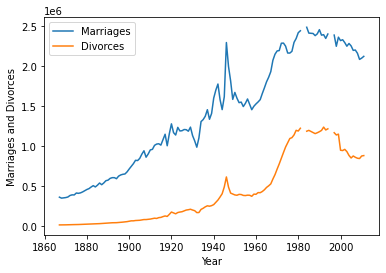

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


mrg=pd.read_csv('us-marriages-divorces-1867-2014.csv')
mrg.plot(x='Year',y=['Marriages','Divorces'])
plt.ylabel('Marriages and Divorces')
plt.show()

QUESTION:7

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

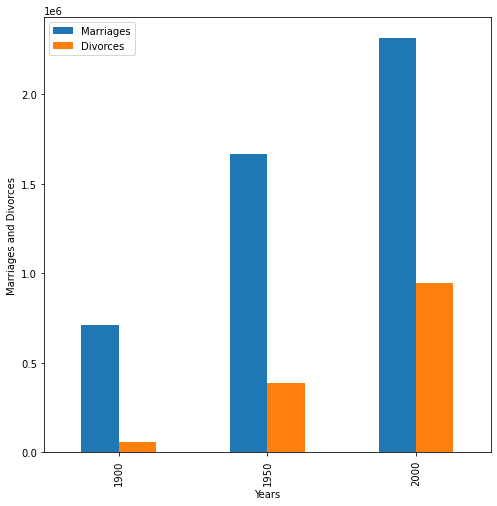

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


mrg=pd.read_csv('us-marriages-divorces-1867-2014.csv')
sub_mrg=mrg[(mrg.Year==1900) | (mrg.Year==1950) | (mrg.Year==2000)]
sub_mrg.plot(x='Year',y=['Marriages','Divorces'], kind="bar",figsize=(8,8))
plt.xlabel('Years')
plt.ylabel('Marriages and Divorces')
plt.show()

QUESTION:8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

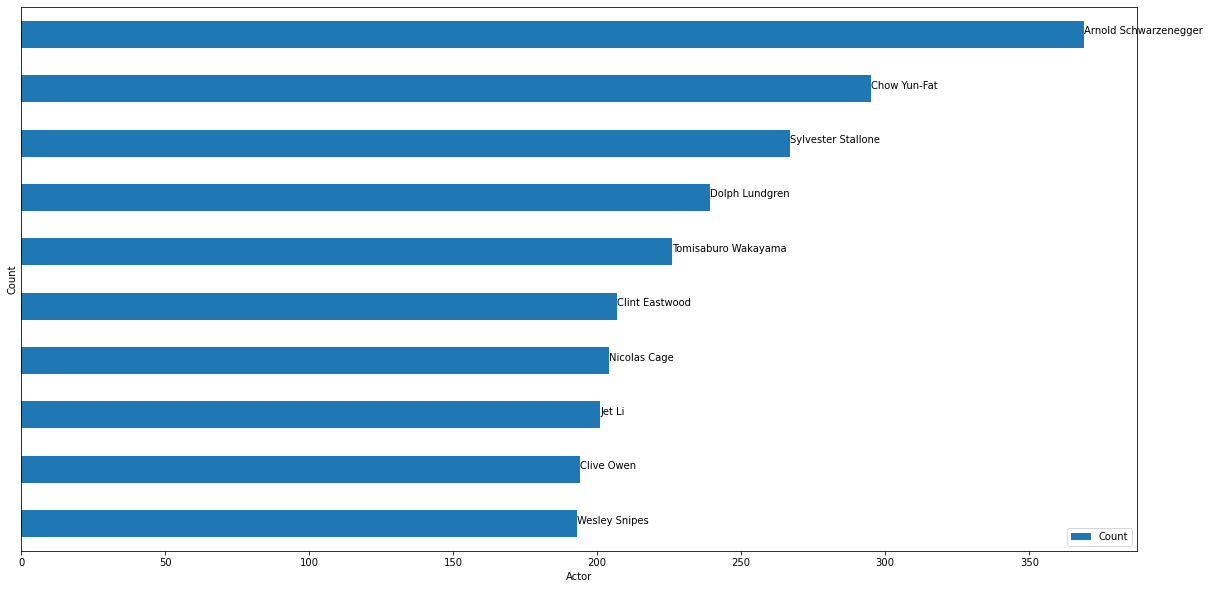

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


kill=pd.read_csv('actor_kill_counts.csv')

kill=kill.sort_values(['Count'])
kill = kill.reset_index(drop=True)

kill.plot.barh('Actor','Count',figsize=(20,10))
plt.xlabel('Actor')
plt.ylabel('Count')
plt.yticks([])
for index, value in enumerate(kill['Count']):
    plt.text(value, index, kill.loc[index,'Actor'])
plt.show()

QUESTION:9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

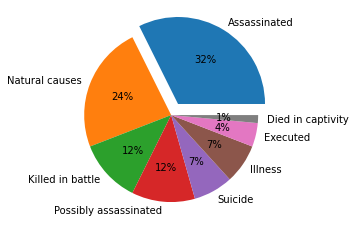

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


empr=pd.read_csv('roman-emperor-reigns.csv')
data=empr["Cause_of_Death"].value_counts()
plt.pie(data,labels=data.index, autopct='%1.0f%%',explode=(0.15, 0, 0, 0,0 ,0,0,0)) 
plt.show()

QUESTION:10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

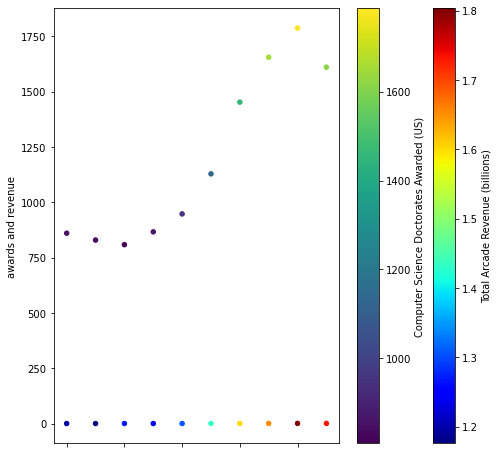

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


edu=pd.read_csv('C:\\Users\\mehul\\Desktop\\assignment\\arcade-revenue-vs-cs-doctorates.csv')

ax1=edu.plot.scatter(x = 'Year', y = 'Total Arcade Revenue (billions)' ,c='Total Arcade Revenue (billions)', colormap='jet',figsize=(8,8))

edu.plot.scatter(x = 'Year', y = 'Computer Science Doctorates Awarded (US)',ax=ax1 ,c='Computer Science Doctorates Awarded (US)', colormap='viridis')
plt.ylabel('awards and revenue')
plt.show()